<a href="https://colab.research.google.com/github/JoelMuhanguzi/dataanalyticsexam/blob/main/datavisualizationassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CORPUS CREATION

In [105]:
#load dataset
import pandas as pd
npr = pd.read_excel("https://www.fams-cit.com/fscomments",sheet_name='Worksheet')

In [106]:
npr.head()

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...


Preprocessing using term frequency

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(npr['Comment'].values.astype('U'))

In [108]:
dtm

<4945x2958 sparse matrix of type '<class 'numpy.float64'>'
	with 48596 stored elements in Compressed Sparse Row format>

Using Non-Negative Matrix Factorization (NMF)


1.   Dimensionality reduction
2.   Clustering

Pros:
- works on large number of attributes
- attributes with weak predictability



In [109]:
# USE 5 CLUSTERS BECAUSE WE HAVE 5 CATEGORIES
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5,random_state=42)
nmf_model.fit(dtm)
 
print("record size : ",len(tfidf.get_feature_names()))

record size :  2958


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [110]:
import random
for i in range(10):
    random_word_id = random.randint(0,2821)
    print(tfidf.get_feature_names()[random_word_id])

awaiting
hand
perfectly
statistics
kindly
hastings
ensured
kit
deals
swaib


Top 20 words for every topic/cluster using NMF

In [111]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 20 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

THE TOP 20 WORDS FOR TOPIC #0
['computer', 'network', 'designing', 'laptop', 'handled', 'amidst', 'website', 'systems', 'able', 'areas', 'challenged', 'targets', 'technically', 'networking', 'week', 'development', 'tasks', 'irrespective', 'hand', 'progressive']


THE TOP 20 WORDS FOR TOPIC #1
['environment', 'layer', 'challenge', 'managed', 'devices', 'configuring', 'satisfaction', 'student', 'despite', 'setting', 'complete', 'time', 'assigned', 'main', 'task', 'challenges', 'successfully', 'week', 'tasks', 'completed']


THE TOP 20 WORDS FOR TOPIC #2
['operating', 'attitude', 'understanding', 'systems', 'performance', 'linux', 'knowledge', 'management', 'ui', 'assigned', 'learn', 'working', 'job', 'student', 'time', 'great', 'team', 'work', 'progress', 'good']


THE TOP 20 WORDS FOR TOPIC #3
['hands', 'challenges', 'challenge', 'complete', 'despite', 'managed', 'best', 'wish', 'successfully', 'write', 'present', 'finished', 'new', 'skills', 'report', 'explaining', 'acquired', 'suppose

Assign topics to dataframes

In [112]:
topic_results = nmf_model.transform(dtm)
npr['Topic'] = topic_results.argmax(axis=1)
npr.head(50)

,comment_id,Comment,Topic
0,5,djfjkdfjkjkffdk edited,0
1,41,Faith has exhibited enthusiasm in taking on th...,4
2,49,He now has now understood the structure of gra...,4
3,50,The Intern was oriented on ICT setup and Infra...,3
4,52,The student was oriented on the organization s...,3
5,53,Activities well completed,1
6,54,finished on time,3
7,55,The student's weekly progress was justifiably ...,2
8,56,Noted,1
9,57,She found this very interesting as she was abl...,4


Assign Cluster Names: By Observation

In [113]:
myDict = {0 : 'Very Poor' , 1 : 'Poor', 2 : 'Good', 3 : 'Excellent',4 : 'Neutral'}
npr['category'] = npr['Topic'].map(myDict)
npr.head(50)

,comment_id,Comment,Topic,category
0,5,djfjkdfjkjkffdk edited,0,Very Poor
1,41,Faith has exhibited enthusiasm in taking on th...,4,Neutral
2,49,He now has now understood the structure of gra...,4,Neutral
3,50,The Intern was oriented on ICT setup and Infra...,3,Excellent
4,52,The student was oriented on the organization s...,3,Excellent
5,53,Activities well completed,1,Poor
6,54,finished on time,3,Excellent
7,55,The student's weekly progress was justifiably ...,2,Good
8,56,Noted,1,Poor
9,57,She found this very interesting as she was abl...,4,Neutral


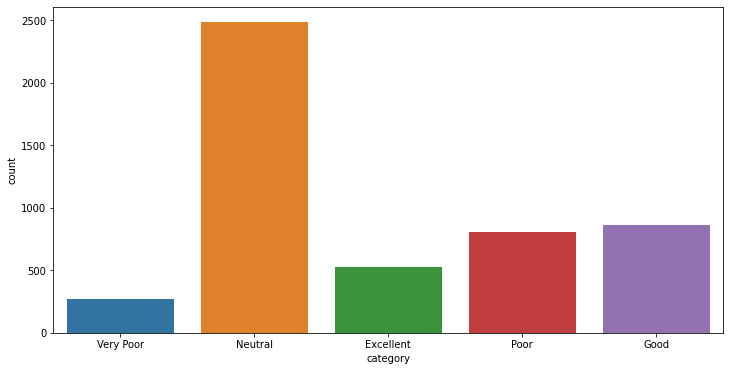

In [117]:
# Plot graph to check class imbalance of data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
sns.countplot(x='category',data=npr)

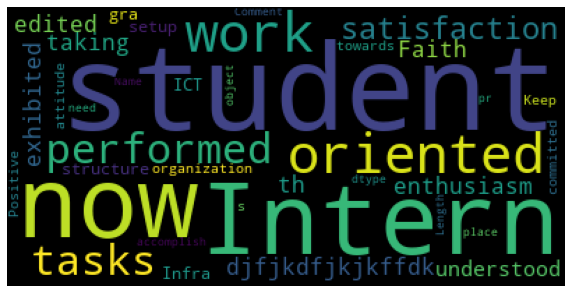

In [118]:
#!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(max_words=100).generate(str(npr.Comment))

print(wordcloud)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

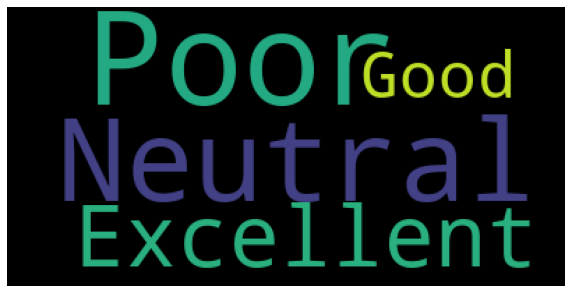

In [119]:
wordcloud2 = WordCloud(max_words=4).generate(str(npr.category))

print(wordcloud2)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

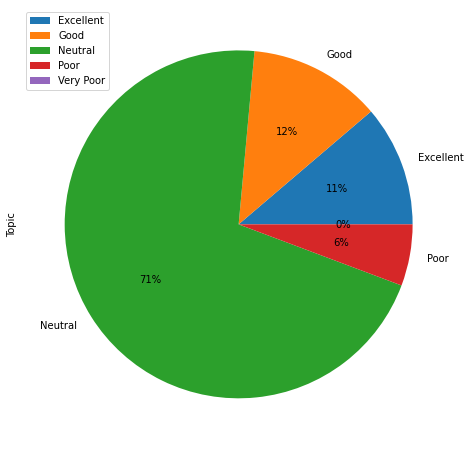

In [120]:
npr.groupby(['category']).sum().plot(kind='pie', y='Topic',figsize=(10,8),autopct='%1.0f%%')

In [97]:
import csv

with open('data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(npr['Topic'], (npr.groupby(['Topic'])).sum()))

In [91]:
f

<_io.TextIOWrapper name='data.csv' mode='w' encoding='UTF-8'>

## **NAMED ENTITY RECOGNITION**

In [121]:
import spacy

In [122]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

In [123]:
doc = nlp("Joel Tiba  started working at Turing in Uganda in 2021 His main language spoken is English and is earning 10$ per hour")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Joel Tiba    |  PERSON  |  People, including fictional
Uganda  |  GPE  |  Countries, cities, states
2021  |  DATE  |  Absolute or relative dates or periods
English  |  LANGUAGE  |  Any named language
10$ per hour  |  MONEY  |  Monetary values, including unit


In [126]:
displacy.render(doc, style="ent", jupyter=True)

In [137]:
doc = nlp(npr['Comment'].iloc[3])
#doc = nlp("The Intern was oriented on ICT setup and Infrastructure of Soroti University drafted workplan and started off the Internship Simon was encouraged to take the Internship seriously as there was a lot to learn")
# for ent in doc.ents:
#     print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))
displacy.render(doc, style="ent", jupyter=True)

In [141]:
for x in (npr['Comment'].iloc[1:50]):
  doc = nlp(x)
  print(x)
  for ent in doc.ents:
    if ent.label_ == "TIME" or ent.label_ == "PERSON" or ent.label_ == "LOC" or ent.label_ == "ORG":
      print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))
      print("")
    else:
      print("----- NO DISCOVRED ENTITIES\n")
  #displacy.render(doc, style="ent", jupyter=True)

Faith has exhibited enthusiasm in taking on the project at hand. She has already shown promising signs in understanding the core concepts of software engineering. I look forward discovering more as time goes on.
He now has now understood the structure of grails and how different components relate. Understands the process of getting API's from MTN
API  |  ORG  |  Companies, agencies, institutions, etc.

MTN  |  ORG  |  Companies, agencies, institutions, etc.

The Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship. Simon was encouraged to take the Internship seriously as there was a lot to learn.
ICT  |  ORG  |  Companies, agencies, institutions, etc.

Infrastructure of Soroti University  |  ORG  |  Companies, agencies, institutions, etc.

Internship  |  ORG  |  Companies, agencies, institutions, etc.

Internship  |  ORG  |  Companies, agencies, institutions, etc.

The student was oriented on the organization structur

In [79]:
nlp.get_pipe("ner").labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')